In [1]:
%matplotlib inline
%load_ext autoreload

from pathlib import Path
import fastplotlib as fpl
import os
import sys
import masknmf
import tifffile
import torch
import numpy as np

import matplotlib.pyplot as plt
import time

Image(value=b'version https://git-lfs.github.com/spec/...', height='55', width='300')

Valid,Device,Type,Backend,Driver
✅ (default),NVIDIA RTX A4000,DiscreteGPU,Vulkan,560.94
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
❗ limited,Microsoft Basic Render Driver,CPU,D3D12,
❌,NVIDIA RTX A4000/PCIe/SSE2,Unknown,OpenGL,4.6.0 NVIDIA 560.94


In [2]:
def load_from_dir(plane_dir):
    """
    Load all result files generated by `run_plane` from a given plane directory.

    Returns
    -------
    dict
        Dictionary with the following keys:

        - 'moco': np.ndarray
              Motion-corrected data array.

        - 'pmd_demixer': object
              Deserialized PMD demixer object containing the full demixing state.

        - 'a': np.ndarray
              Spatial components array with shape (height, width, n_components).
              Each component is a 2D spatial footprint.

        - 'c': np.ndarray
              Temporal components array with shape (n_frames, n_components).
              Each column is a time series for one component.
    """
    plane_dir = Path(plane_dir).expanduser()

    results = {}
    moco_path = plane_dir / "data_reg.npy"
    pmd_demixer_path = plane_dir / "pmd_demixer.npy"
    a_path = plane_dir / "a.npy"
    c_path = plane_dir / "a.npy"

    if moco_path.exists():
        results["moco"] = np.load(moco_path, allow_pickle=True)
    if pmd_demixer_path.exists():
        results["pmd_demixer"] = np.load(pmd_demixer_path, allow_pickle=True).item()
    if a_path.exists():
        results["a"] = np.load(a_path)
    if c_path.exists():
        results["c"] = np.load(c_path)
    return results

In [81]:
path1 = r"D:\W2_DATA\masknmf\mk301_kbarber\roi_1"
path2 = r"D:\W2_DATA\masknmf\mk301_kbarber\roi_2"
path3 = r"D:\W2_DATA\masknmf\mk301_kbarber\full_fov\plane7"

roi1_outputs = load_from_dir(path1)
roi2_outputs = load_from_dir(path2)
full_outputs = load_from_dir(path3)

In [82]:
roi1_results = roi1_outputs['pmd_demixer'].results
roi2_results = roi2_outputs['pmd_demixer'].results

In [84]:
full_results = full_outputs["pmd_demixer"].results

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
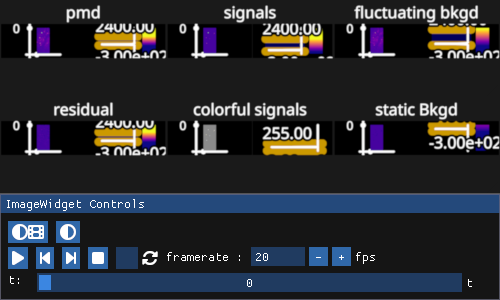

In [41]:
iw_roi1 = masknmf.visualization.make_demixing_video(
    roi1_results,
    'cuda',
    show_histogram = True,
    v_range = [-300, 2400],
)
iw_roi1.show()

In [44]:
iw_roi1.close()

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
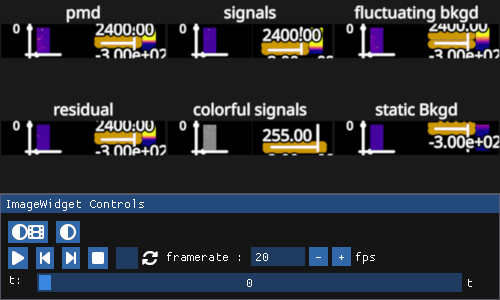

In [39]:
iw_roi2 = masknmf.visualization.make_demixing_video(
    roi2_results,
    'cuda',
    show_histogram = True,
    v_range = [-300, 2400],
)
iw_roi2.show()

RFBOutputContext()

C:\Users\RBO\repos\masknmf-toolbox\.venv\Lib\site-packages\fastplotlib\graphics\features\_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
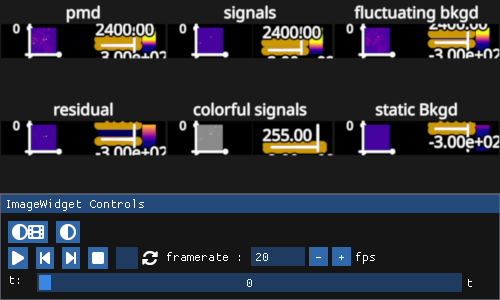

In [85]:
iw_full = masknmf.visualization.make_demixing_video(
    full_results,
    'cuda',
    show_histogram = True,
    v_range = [-300, 2400],
)
iw_full.show()

In [86]:
iw_full.close()

In [47]:
import tifffile
zplane = tifffile.memmap(r"D:\W2_DATA\masknmf\mk301_kbarber\roi_1\plane_07.tif")

In [54]:
tifffile.imwrite(r"D:\W2_DATA\masknmf\mk301_kbarber\roi_1\plane_07_subsample.tif", zplane[:-320])

In [55]:
zplane.shape, zplane[:-320].shape

((5632, 448, 224), (5312, 448, 224))

In [68]:
roi1_outputs["moco"]

()